## Imports

In [41]:
# Main imports
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import string
import plotly.graph_objects as go

# sklearn models
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import sklearn.metrics as metrics

from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_val_predict
from sklearn.preprocessing import PolynomialFeatures, StandardScaler


from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, auc

from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import Pipeline


# Other relevant imports
import warnings
warnings.filterwarnings('ignore')

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

pd.set_option('max_rows',None)
%matplotlib inline
sns.set()

In [2]:
# Loading the necessary datasets
df = pd.read_csv('../data/df_clean.csv')
#XXX = pd.read_csv('./data/XXXX.csv')
#XXX = pd.read_csv('./data/XXX.csv')

In [3]:
df.head().T

,0,1,2,3,4
ID,158023,20801,190871,193080,192985
Name,L. Messi,Cristiano Ronaldo,Neymar Jr,De Gea,K. De Bruyne
Age,31,33,26,27,27
Nationality,Argentina,Portugal,Brazil,Spain,Belgium
Overall,94,94,92,91,91
Potential,94,94,93,93,92
Club,FC Barcelona,Juventus,Paris Saint-Germain,Manchester United,Manchester City
Value,1.105e+08,7.7e+07,1.185e+08,7.2e+07,1.02e+08
Wage,565000,405000,290000,260000,355000
Preferred Foot,Left,Right,Right,Right,Right


In [4]:
#df.dtypes

In [5]:
df.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

### Pre-Processing

### Feature Engineering

In [6]:
# Categorize players' positions 
# Adapted from Nitin Datta

def main_position(df):
    if (df['Position'] == 'GK'):
        return 'GK'
    elif ((df['Position'] == 'RB') | (df['Position'] == 'LB') | (df['Position'] == 'RWB') | (df['Position'] == 'LWB') ):
        return 'FB'
    elif ((df['Position'] == 'CB') | (df['Position'] == 'LCB') | (df['Position'] == 'RCB') ):
        return 'CB'
    elif ((df['Position'] == 'LDM') | (df['Position'] == 'CDM') | (df['Position'] == 'RDM')):
        return 'CDM'
    elif ((df['Position'] == 'LM') | (df['Position'] == 'RM') | (df['Position'] == 'LW') | (df['Position'] == 'RW')):
        return 'WING'
    elif ((df['Position'] == 'LCM') | (df['Position'] == 'CM') | (df['Position'] == 'RCM') ):
        return 'CM'
    elif ((df['Position'] == 'LAM') | (df['Position'] == 'CAM') | (df['Position'] == 'RAM') ):
        return 'AM'
    elif ((df['Position'] == 'RS') | (df['Position'] == 'ST') | (df['Position'] == 'LS') | (df['Position'] == 'CF') | (df['Position'] == 'LF') | (df['Position'] == 'RF')):
        return 'ST'
    else:
        return df.Position

In [7]:
# Binarize Preferred Foot
df['Preferred Foot'] = df['Preferred Foot'].apply(lambda x: 1 if x  == 'Right' else 0)

In [8]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,1,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,1,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,1,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,1,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [9]:
#df1 = df.copy()

In [10]:
high_corr = (abs(df.corr()[['Value']])>0.20)['Value']
high_corr

ID                          False
Age                         False
Overall                      True
Potential                    True
Value                        True
Wage                         True
Preferred Foot              False
International Reputation     True
Weak Foot                   False
Skill Moves                  True
Contract Valid Until         True
Crossing                     True
Finishing                    True
HeadingAccuracy             False
ShortPassing                 True
Volleys                      True
Dribbling                    True
Curve                        True
FKAccuracy                   True
LongPassing                  True
BallControl                  True
Acceleration                False
SprintSpeed                 False
Agility                     False
Reactions                    True
Balance                     False
ShotPower                    True
Jumping                     False
Stamina                      True
Strength      

In [11]:
#df.corr()['Value'].sort_values(ascending=False)

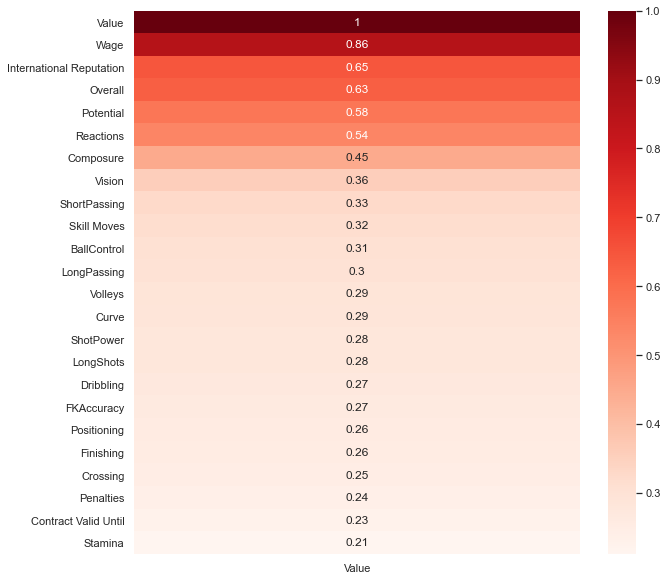

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr()[['Value']].sort_values('Value', ascending=False).head(24), annot=True, cmap='Reds');

In [13]:
df_cat = pd.get_dummies(df[['Nationality', 'Club', 'Preferred Foot', 'Work Rate', 'Body Type', 'Position']])

In [14]:
df_cat_heatmap = pd.concat([df.Value, pd.get_dummies(df[['Nationality', 'Club', 'Preferred Foot', 'Work Rate', 'Body Type', 
                                                  'Position']])], axis = 1)

### Heatmap for Categorical Features

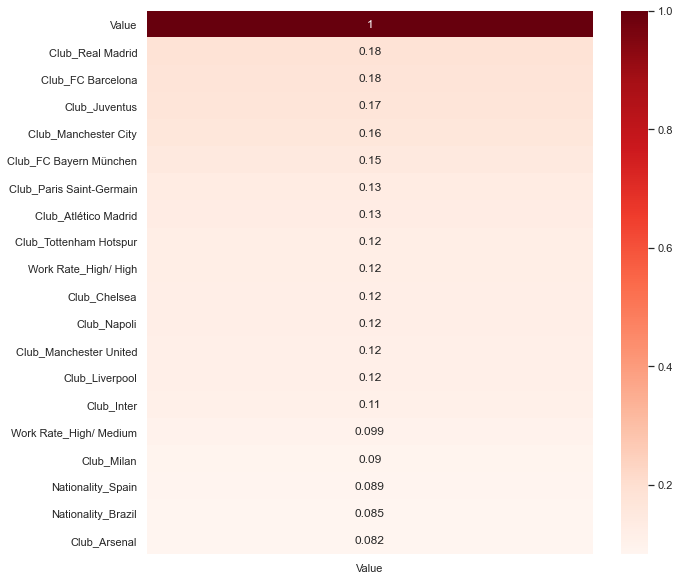

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(df_cat_heatmap.corr()[['Value']].sort_values('Value', ascending=False).head(20), annot=True, cmap='Reds');

As seen from the heatmap above, the clubs with the highest correlation to a players' value are Real Madrid, Barcelona, Juventus. For work rate, the highest correlations are High/High and High/Medium. As for nationality, players from Spain or Brazil have the highest correlation with value.

In [16]:
# Dummify Categorical Variables
# drop_first=True

#df = pd.concat([df, pd.get_dummies(df[['Nationality', 'Club', 'Preferred Foot', 'Work Rate', 'Body Type', 'Position',
#                                      'Contract Valid Until']])], axis = 1)
#df.drop(['ID', 'Name', 'GKDiving', 'GKHandling','GKKicking', 'GKPositioning', 'GKReflexes',
#                    'Nationality', 'Club', 'Preferred Foot', 'Work Rate', 'Body Type', 'Position',
     #                                 'Contract Valid Until', 'Height', 'Weight', ], axis=1, inplace=True)
#df.head()

### Modeling
### (1) Linear Regression
### (2) Random Forest Regression
### (3) Lasso Regression
### (4) Ridge Regression

In [17]:
#https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf

In [18]:
# baseline accuracy
df["Value"].mean()

2410695.8861976163

In [19]:
df_num = df[['Wage', 'International Reputation', 'Overall', 'Potential', 'Reactions', 'Composure', 'Vision',
         'ShortPassing', 'Skill Moves', 'BallControl', 'LongPassing', 'Volleys', 'Curve', 'ShotPower',
         'LongShots', 'Dribbling', 'FKAccuracy', 'Positioning', 'Finishing', 'Crossing', 'Penalties', 
          'Contract Valid Until', 'Stamina']]

In [20]:
df2 = pd.concat([df_num, df_cat], axis = 1)

In [21]:
df2.columns

Index(['Wage', 'International Reputation', 'Overall', 'Potential', 'Reactions',
       'Composure', 'Vision', 'ShortPassing', 'Skill Moves', 'BallControl',
       ...
       'Position_RB', 'Position_RCB', 'Position_RCM', 'Position_RDM',
       'Position_RF', 'Position_RM', 'Position_RS', 'Position_RW',
       'Position_RWB', 'Position_ST'],
      dtype='object', length=879)

In [22]:
#df2.drop(['Nationality', 'Club', 'Preferred Foot', 'Work Rate', 'Body Type', 'Position',
 #        'Contract Valid Until'], axis=1, inplace=True)

In [23]:
#df1 = pd.concat([df1, pd.get_dummies(df[['Name']],drop_first=True)], axis = 1)
#df1.drop(['Name'], axis=1, inplace=True)

In [24]:
df2.head()

,Wage,International Reputation,Overall,Potential,Reactions,Composure,Vision,ShortPassing,Skill Moves,BallControl,...,Position_RB,Position_RCB,Position_RCM,Position_RDM,Position_RF,Position_RM,Position_RS,Position_RW,Position_RWB,Position_ST
0,565000.0,5.0,94,94,95.0,96.0,94.0,90.0,4.0,96.0,...,0,0,0,0,1,0,0,0,0,0
1,405000.0,5.0,94,94,96.0,95.0,82.0,81.0,5.0,94.0,...,0,0,0,0,0,0,0,0,0,1
2,290000.0,5.0,92,93,94.0,94.0,87.0,84.0,5.0,95.0,...,0,0,0,0,0,0,0,0,0,0
3,260000.0,4.0,91,93,90.0,68.0,68.0,50.0,1.0,42.0,...,0,0,0,0,0,0,0,0,0,0
4,355000.0,4.0,91,92,91.0,88.0,94.0,92.0,4.0,91.0,...,0,0,1,0,0,0,0,0,0,0


In [25]:
#df1 = df.drop(columns = 'Value')
X = df2
y = df['Value']
#X_val = 

In [26]:
# X = XXX
# y = XXX

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [28]:
#sc = StandardScaler()
#X_train_scaled = sc.fit_transform(X_train)
#X_test_scaled = sc.transform(X_test)

### (1) Linear Regression

In [29]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [30]:

# predict on test set
#pred_lr = lr.predict(X_test)
#lr_r2_score = metrics.r2_score(y_test, pred_lr)
#lr_r2_score

In [35]:
# Generating scores
train_lr = lr.score(X_train, y_train)
print(f'Linear Regression Train Score:', train_lr)

#pred_lr = lr.predict(X_test)
#r2_lr = metrics.r2_score(y_test, pred_lr)
#print(f'Linear Regression r2 Score:', r2_lr)

accuracy_lr = lr.score(X_test, y_test)
print(f'Linear Regression Accuracy Score:', accuracy_lr)
var_lr = train_lr - accuracy_lr
print(f'Linear Regression Variance:', var_lr)
crossval_lr = cross_val_score(lr, X_train, y_train, cv=3).mean()
print(f'Linear Regression Cross Validation Score:', crossval_lr)

Linear Regression Train Score: 0.8423762194170006
Linear Regression Accuracy Score: 0.842504240241267
Linear Regression Variance: -0.00012802082426643935
Linear Regression Cross Validation Score: -815539998154.1329


In [36]:
#np.sqrt(mean_squared_error(y_test, pred_lr))
from sklearn.metrics import mean_squared_error

pred_lr = lr.predict(X_test)

rmse = mean_squared_error(y_test, pred_lr, squared=False)
rmse

2232014.2843787125

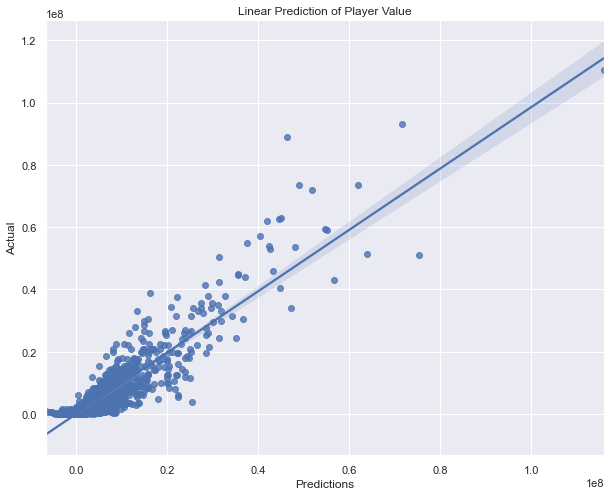

In [37]:
#Visualising the results
plt.figure(figsize=(10,8))
sns.regplot(pred_lr,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Linear Prediction of Player Value")
plt.show()

### K Nearest Neighbours

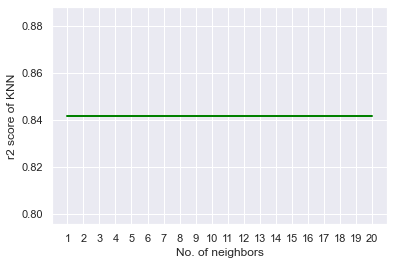

In [37]:
## Finding the optimal number of neighbors for KNN regression
from sklearn.neighbors import KNeighborsRegressor
knnRange = range(1,21,1)
scores_list = []
for i in knnRange:
    regressor_knn = KNeighborsRegressor(n_neighbors=i)
    regressor_knn.fit(X_train,y_train)
    y_pred = regressor_knn.predict(X_test)
    scores_list.append(r2_score(y_test,pred_lr))
plt.plot(knnRange,scores_list,linewidth=2,color='green')
plt.xticks(knnRange)
plt.xlabel('No. of neighbors')
plt.ylabel('r2 score of KNN')
plt.show()

In [38]:
regressor_knn = KNeighborsRegressor(n_neighbors=6)
regressor_knn.fit(X_train,y_train)
pred_knn = regressor_knn.predict(X_test)
r2_knn = r2_score(y_test,pred_knn)
print(r2_knn)

0.8023179161862205


### Random Forest

In [51]:
# Training the Random Forest regression on the training model
rf = RandomForestRegressor(n_estimators=150,random_state=42)
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=150, random_state=42)

In [49]:
#def rf_pipe_func(pipe, params):
#    ''' Function to execute Gridsearch CV to find
#        best parameters for Random Forest model.
#        Output returns the relevant scores'''
#    gs_rf = GridSearchCV(estimator=pipe, param_grid=params, cv=5, verbose=1, n_jobs=6)
#    gs_rf.fit(X_train, y_train)
#    train_rf = gs_rf.score(X_train, y_train)
#    print(f'Training Score:', train_rf)
#    y_pred_rf = gs_rf.best_estimator_.predict(X_test)
#    accuracy_rf = accuracy_score(y_pred_rf, y_test)
#    print(f"Accuracy Score:", accuracy_rf)
#    var_rf = train_score_rf - accuracy_rf
#    print(f"Variance:", var_rf)
#    crossval_rf = gs_rf.best_score_
#    print(f'CrossVal Score:', crossval_rf)
#    y_pred_prob_rf = gs_rf.best_estimator_.predict_proba(X_test)[:, 1]
#    print(f'Best Params:{gs_rf.best_params_}')
#    return gs_rf

In [50]:
#rf_pipe = Pipeline([
#    ("rand_for", RandomForestRegressor(random_state=42))])

#rf_params = {
#    "rand_for__n_estimators": [50, 100, 150],
#    "rand_for__max_depth": [100, 200, 300],
#    "rand_for__min_samples_split": [5, 25, 50],}

# running the gridsearch on the whole thing
#rf_model = rf_pipe_func(rf_pipe, rf_params)

In [52]:
 # Generating scores
train_rf = rf.score(X_train, y_train)
print(f'Random Forest Train Score:', train_rf)

#pred_lr = lr.predict(X_test)
#pred_lr = lr.predict(X_test)
#lr_r2 = metrics.r2_score(y_test, pred_lr)
#lr_r2

accuracy_rf = rf.score(X_test, y_test)
print(f'Logistic Regression Accuracy Score:', accuracy_rf)
var_rf = train_rf - accuracy_rf
print(f'Logistic Regression Variance:', var_rf)
crossval_rf = cross_val_score(rf, X_train, y_train, cv=3).mean()
print(f'Logistic Regression Cross Validation Score:', crossval_rf)

Random Forest Train Score: 0.9946604212673091
Logistic Regression Accuracy Score: 0.972066584075
Logistic Regression Variance: 0.02259383719230912
Logistic Regression Cross Validation Score: 0.9577965475586331


In [53]:
# Finding out the optimal number of trees for Random Forest Regression
# Adapted from aninditakarmakar


forestRange=range(50,500,50)
scores_list=[]
for i in forestRange: 
    rf = RandomForestRegressor(n_estimators=i,random_state=42)
    rf.fit(X_train,y_train)
    pred_rf = rf.predict(X_test)
    scores_list.append(r2_score(y_test,pred_rf))
plt.plot(forestRange,scores_list,linewidth=2,color='maroon')
plt.xticks(forestRange)
plt.xlabel('No. of trees')
plt.ylabel('r2 score of Random Forest Reg.')
plt.show() 

KeyboardInterrupt: 

### Lasso

In [54]:
# Set up a list of Lasso alphas to check.
lasso = LassoCV(n_alphas=200)
l_alphas = np.logspace(-3, 0, 100)

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas=l_alphas, cv=5, max_iter=50000)

# Fit model using best Lasso alpha!
lasso_cv.fit(X_train, y_train);

# Here is the optimal value of alpha
lasso_cv.alpha_

1.0

In [55]:
# Generating scores
train_lasso = lasso_cv.score(X_train, y_train)
print(f'Lasso Regression Train Score:', train_lasso)

#pred_lr = lr.predict(X_test)
#pred_lr = lr.predict(X_test)
#lr_r2 = metrics.r2_score(y_test, pred_lr)
#lr_r2

accuracy_lasso = lasso_cv.score(X_test, y_test)
print(f'Lasso Regression Accuracy Score:', accuracy_lasso)
var_lasso = train_lasso - accuracy_lasso
print(f'Lasso Regression Variance:', var_lasso)
crossval_lasso = cross_val_score(lasso_cv, X_train, y_train, cv=3).mean()
print(f'Lasso Regression Cross Validation Score:', crossval_lasso)

Lasso Regression Train Score: 0.8423761740953576
Lasso Regression Accuracy Score: 0.842516227057158
Lasso Regression Variance: -0.0001400529618004187
Lasso Regression Cross Validation Score: 0.817024587107637


In [56]:
# Predicting lasso on test set
pred_lasso = lasso_cv.predict(X_test)

Lasso Train Score: 0.8423761740953576
Lasso Test Score: 0.842516227057158


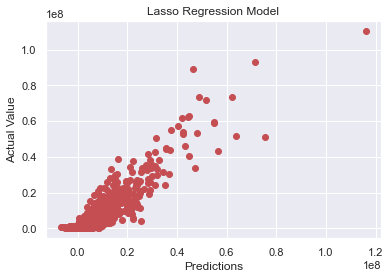

In [57]:
plt.scatter(pred_lasso, y_test, color='r')
plt.xlabel("Predictions")
plt.ylabel("Actual Value")
plt.title('Lasso Regression Model')

print("Lasso Train Score:", lasso_cv.score(X_train, y_train))
print("Lasso Test Score:", lasso_cv.score(X_test, y_test))

### Ridge Regression

In [64]:
# Set up a list of ridge alphas to check.
r_alphas = np.logspace(0, 5, 100)

# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=5)

# Fit model using best ridge alpha!
ridge_cv.fit(X_train, y_train)

# Here is the optimal value of alpha
ridge_cv.alpha_

3.1992671377973836

In [65]:
# Generating scores
train_ridge = ridge_cv.score(X_train, y_train)
print(f'Rdige Regression Train Score:', train_ridge)

accuracy_ridge = ridge_cv.score(X_test, y_test)
print(f'Ridge Regression Accuracy Score:', accuracy_ridge)
var_ridge = train_ridge - accuracy_ridge
print(f'Ridge Regression Variance:', var_ridge)
crossval_ridge = cross_val_score(ridge_cv, X_train, y_train, cv=3).mean()
print(f'Ridge Regression Cross Validation Score:', crossval_ridge)

Rdige Regression Train Score: 0.8400148446585216
Ridge Regression Accuracy Score: 0.8444181622082868
Ridge Regression Variance: -0.0044033175497651955
Ridge Regression Cross Validation Score: 0.818885072627503


Ridge Train Score: 0.8400148446585216
Ridge Test Score: 0.8444181622082868


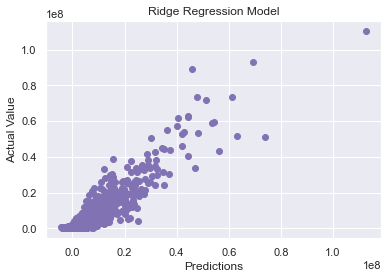

In [66]:
# Predicting ridge on test set
pred_ridge = ridge_cv.predict(X_test)

plt.scatter(pred_ridge, y_test, color='m')
plt.xlabel("Predictions")
plt.ylabel("Actual Value")
plt.title('Ridge Regression Model')

print("Ridge Train Score:", ridge_cv.score(X_train, y_train))
print("Ridge Test Score:", ridge_cv.score(X_test, y_test))

### Model Comparisons

In [68]:
# Create a df to compare results between models
first_pass_df = pd.DataFrame([[train_lr, train_rf, train_lasso, train_ridge],
                              [accuracy_lr, accuracy_rf, accuracy_lasso, accuracy_ridge],
                              [var_lr, var_rf, var_lasso, var_ridge],
                              [crossval_lr, crossval_rf, crossval_lasso, crossval_ridge]],
                              columns = ["Logistic Regression", "Random Forest", "Lasso Regression", "Ridge Regression"], 
                              index=["Train Score", "Accuracy Score", "Variance", "Cross Val"])
first_pass_df

,Logistic Regression,Random Forest,Lasso Regression,Ridge Regression
Train Score,8.423762e-01,0.994660,0.842376,0.840015
Accuracy Score,8.425042e-01,0.972067,0.842516,0.844418
Variance,-1.280208e-04,0.022594,-0.000140,-0.004403
Cross Val,-8.155400e+11,0.957797,0.817025,0.818885


### Best Model